In [189]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from scipy import stats
import math
from PIL import Image

In [190]:
df = pd.read_csv("data/kc_house_data_no_miss_values.csv")
df =df.drop(["Unnamed: 0"], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,205425.0,2,1.00,880,6780,1.0,0,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,236000.0,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,0,2,1,3990,0.0,1989,0.0,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0,0
21416,1950000.0,4,3.50,4065,18713,2.0,0,2,0,4065,0.0,1987,0.0,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0,0
21417,2250000.0,5,5.25,3410,8118,2.0,0,0,1,3410,0.0,2006,0.0,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0,0
21418,2900000.0,5,4.00,5190,14600,2.0,0,0,1,5190,0.0,2013,0.0,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0,1


In [191]:
#Dropping outliers
df = df[df["price"] < 1500000]
df = df[(np.abs(stats.zscore(df["sqft_living"])) < 3)]
df = (df[df["bedrooms"] < 7])
df = (df[df["bathrooms"] < 6])
df = (df[df["sqft_living"] < 8000])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0,0
1,205425.0,2,1.00,880,6780,1.0,0,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0,1
3,236000.0,3,1.00,1300,5898,1.0,0,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0,1
21404,1200000.0,4,3.00,2150,8119,2.0,0,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1,0
21407,1450000.0,5,2.75,3090,19865,1.0,0,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0,1


In [192]:
df.to_csv("data/kc_house_data_clean.csv")

In [193]:
initial_corr = df.corr().sort_values(by="price", ascending=False)
initial_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
price,1.000000,0.307503,0.464704,0.637735,0.074134,0.268744,0.089783,0.023353,-0.164273,0.534308,0.248395,0.042555,0.098397,-0.000039,0.404926,0.033921,0.568658,0.064347,-0.155142,-0.042555,-0.002165,-0.005014,0.098024,0.283409
sqft_living,0.637735,0.605001,0.719405,1.000000,0.143358,0.345993,0.009667,-0.090957,-0.135941,0.851913,0.363560,0.345618,0.028754,-0.186427,0.027801,0.268667,0.742306,0.156252,-0.179022,-0.345618,-0.034087,0.018424,0.028538,0.186229
sqft_living15,0.568658,0.393672,0.529782,0.742306,0.134594,0.263879,0.020561,-0.124487,-0.159653,0.716498,0.123999,0.341830,-0.024509,-0.262432,0.031784,0.354534,1.000000,0.173168,-0.228944,-0.341830,-0.027798,0.009084,-0.024518,0.207904
sqft_above,0.534308,0.482002,0.638459,0.851913,0.153739,0.532618,-0.005082,-0.200294,-0.163399,1.000000,-0.169309,0.455113,0.001435,-0.244159,-0.028884,0.377575,0.716498,0.167298,-0.201265,-0.455113,-0.028772,0.017136,0.001380,0.072994
bathrooms,0.464704,0.504654,1.000000,0.719405,0.055509,0.505217,0.002514,-0.163613,-0.018102,0.638459,0.215676,0.537020,0.030373,-0.187538,0.002375,0.236141,0.529782,0.053796,-0.111313,-0.537020,-0.030547,0.012857,0.029927,0.107981
lat,0.404926,-0.029975,0.002375,0.027801,-0.095577,0.042102,-0.034702,-0.021291,-0.010984,-0.028884,0.103313,-0.152828,0.023866,0.308555,1.000000,-0.136152,0.031784,-0.099173,0.010494,0.152828,-0.030114,0.016828,0.023806,-0.005885
bedrooms,0.307503,1.000000,0.504654,0.605001,0.022095,0.165419,-0.035239,0.009596,0.015720,0.482002,0.276512,0.170382,0.002013,-0.156385,-0.029975,0.145424,0.393672,0.019215,-0.046154,-0.170382,-0.008130,-0.001736,0.001766,0.046313
view_cat,0.283409,0.046313,0.107981,0.186229,0.062612,-0.014788,0.195993,0.039931,-0.026730,0.072994,0.215953,-0.079304,0.065764,0.097177,-0.005885,-0.095852,0.207904,0.058682,-0.074453,0.079304,0.003159,-0.002165,0.065875,1.000000
floors,0.268744,0.165419,0.505217,0.345993,-0.022261,1.000000,-0.003418,-0.296919,0.018494,0.532618,-0.290290,0.500307,-0.002313,-0.035782,0.042102,0.126098,0.263879,-0.028951,-0.023220,-0.500307,-0.024099,0.018457,-0.002380,-0.014788
sqft_basement,0.248395,0.276512,0.215676,0.363560,-0.003283,-0.290290,0.026013,0.178946,0.033950,-0.169309,1.000000,-0.155296,0.051093,0.081225,0.103313,-0.162403,0.123999,-0.004475,0.019511,0.155296,-0.013181,0.005908,0.050784,0.215953


In [194]:
zip_code = df["zipcode"].value_counts().index[:5]
zip_code

Int64Index([42, 23, 49, 28, 51], dtype='int64')

In [195]:
view = df["view"].value_counts().index[:5]
view

KeyError: 'view'

In [ ]:
df1 = df[df['zipcode'].isin(zip_code)]
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
2872,323000.0,3,2.50,1890,6560,2.0,0,4,0,8,1890,0.0,2003,0.0,23,47.3684,-122.031,2390,7570,152632.0,19,2015,0,0
2873,360000.0,4,2.50,2380,5000,2.0,0,4,0,9,2380,0.0,2005,0.0,23,47.3608,-122.036,2420,5000,152632.0,17,2014,2,0
2874,390000.0,3,2.50,2350,5100,2.0,0,4,0,9,2350,0.0,2003,0.0,23,47.3512,-122.008,2350,5363,152632.0,19,2014,3,0
2875,360000.0,4,2.50,1900,5889,2.0,0,4,0,8,1900,0.0,1992,0.0,23,47.3490,-122.031,1870,6405,152632.0,30,2014,3,0
2876,314000.0,3,1.75,1810,41800,1.0,0,4,4,8,1210,600.0,1980,0.0,23,47.4109,-121.958,1650,135036,152632.0,42,2014,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,352500.0,2,2.50,980,1010,3.0,0,4,0,9,980,0.0,2008,0.0,51,47.6844,-122.387,980,1023,162827.0,14,2015,0,0
9124,324000.0,3,2.25,998,904,2.0,0,4,0,8,798,200.0,2007,0.0,51,47.6983,-122.367,998,1110,162827.0,15,2014,1,0
9125,329000.0,2,2.50,980,1020,3.0,0,4,0,9,980,0.0,2008,0.0,51,47.6844,-122.387,980,1023,162827.0,14,2014,3,0
9126,490000.0,3,2.25,1500,1290,2.0,0,4,0,9,1220,280.0,2006,0.0,51,47.6785,-122.375,1460,1375,162827.0,16,2014,3,0


In [ ]:
df2 = df[df['view'].isin(view)]
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,1200000.0,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,1450000.0,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


In [ ]:
X = df.drop("price", axis=1)
y= df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16532, 23)
(4134, 23)
(16532,)
(4134,)


In [ ]:
X_train = df.drop("price", axis=1)
y_train = df["price"]

X_test = df.drop("price", axis=1)
y_test = df["price"]

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


In [ ]:
model = sm.OLS(y, sm.add_constant(X), missing = "drop").fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:57:05   Log-Likelihood:            -2.7429e+05
No. Observations:               20666   AIC:                         5.486e+05
Df Residuals:                   20643   BIC:                         5.488e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -49.2719      3.155    -15.618

In [ ]:
corr = df.corr().sort_values(by="price", ascending=False)

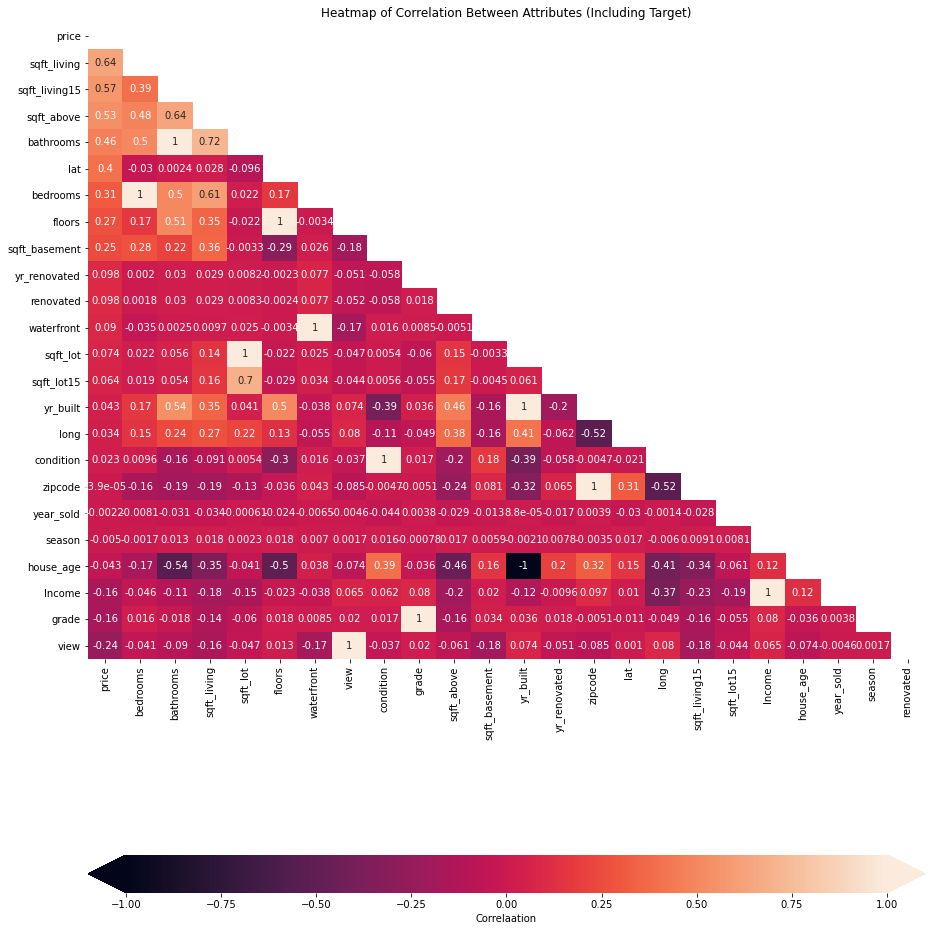

In [ ]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = corr, mask = np.triu(np.ones_like(corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [ ]:
highest_corr = "sqft_living"

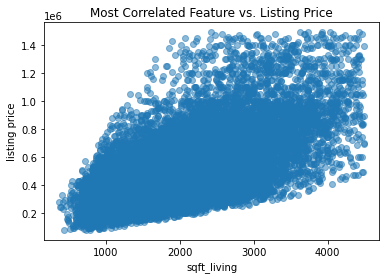

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train[highest_corr], y_train, alpha=0.5)
ax.set_xlabel(highest_corr)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [ ]:
baseline_model = LinearRegression()

In [ ]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[highest_corr]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4044429965410195
Validation score: 0.4128207210971282


In [ ]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


In [ ]:
#df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long",'floors','sqft_basement',
#                 'yr_renovated','renovated','waterfront', 'sqft_lot','yr_built', 'condition', 'zipcode',
#                    'year_sold','season', 'house_age','Income','grade'], axis=1)

In [ ]:
X_train_second_model = X_train_numeric.drop(["lat", "long",'floors',
                 'yr_renovated','renovated','sqft_lot','yr_built',
                   'year_sold','house_age',"sqft_above","sqft_living15"], axis=1).copy()

In [ ]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.46466830306427626
Validation score: 0.46950429971691693

Baseline Model
Train score:      0.4044429965410195
Validation score: 0.4128207210971282


In [ ]:
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1503.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:57:08   Log-Likelihood:            -2.7889e+05
No. Observations:               20666   AIC:                         5.578e+05
Df Residuals:                   20653   BIC:                         5.579e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.991e+05   1.06e+04     28.138      0.000    2.78e+05     3.2e+05
bedrooms      -3.059e+04   1838.471    -16.640      0.000   -3.42e+04    -2.7e+04
bathrooms      2.425e+04   2563.351      9.461      0.000    1.92e+04    2.93e+04
sqft_living     206.1112      2.744     75.103      0.000     200.732     211.490
waterfront       2.2e+05    2.1e+04     10.490      0.000    1.79e+05    2.61e+05
view          -3.192e+04   1466.182    -21.771      0.000   -3.48e+04    -2.9e+04
condition      1.907e+04   1013.652     18.814      0.000    1.71e+04    2.11e+04
grade         -8144.8147    618.870    -13.161      0.000   -9357.849   -6931.780
sqft_basement   -13.7968      3.417     -4.038      0.000     -20.494      -7.099
zipcode        1342.1427     67.177     19.979      0.000    1210.471    1473.814
sqft_lot15       -0.4195      0.050     -8.371      0.000      -0.518      -0.321
Income           -0.1750      0.021     -8.151      0.000      -0.217      -0.133
season        -4463.1990   1181.792     -3.777      0.000   -6779.604   -2146.794
==============================================================================
Omnibus:                     2824.172   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5334.652
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       4.771   Cond. No.                     2.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
significant_features = ["sqft_living", "zipcode","sqft_basement","condition","waterfront",]

In [ ]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4332902676600942
Validation score: 0.4388189833549321

Second Model
Train score:      0.46466830306427626
Validation score: 0.46950429971691693

Baseline Model
Train score:      0.4044429965410195
Validation score: 0.4128207210971282


In [ ]:
X_train_final = X_train[significant_features]
X_test_final = X_test[significant_features]

In [ ]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.43489404255633624

In [ ]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living         211.213522
zipcode            1575.434662
sqft_basement       -15.498016
condition         16948.013273
waterfront       312369.127752
Name: Coefficients, dtype: float64

Intercept: 8282.5384941175


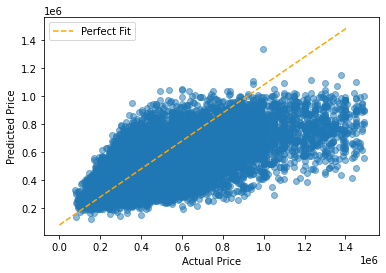

In [ ]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

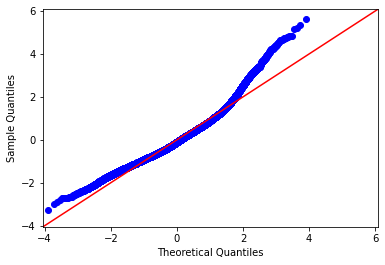

In [ ]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living      3.206871
zipcode          2.738885
sqft_basement    1.677311
condition        1.415515
waterfront       1.005824
Name: Variance Inflation Factor, dtype: float64

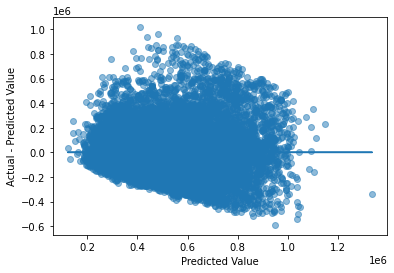

In [ ]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

<AxesSubplot:>

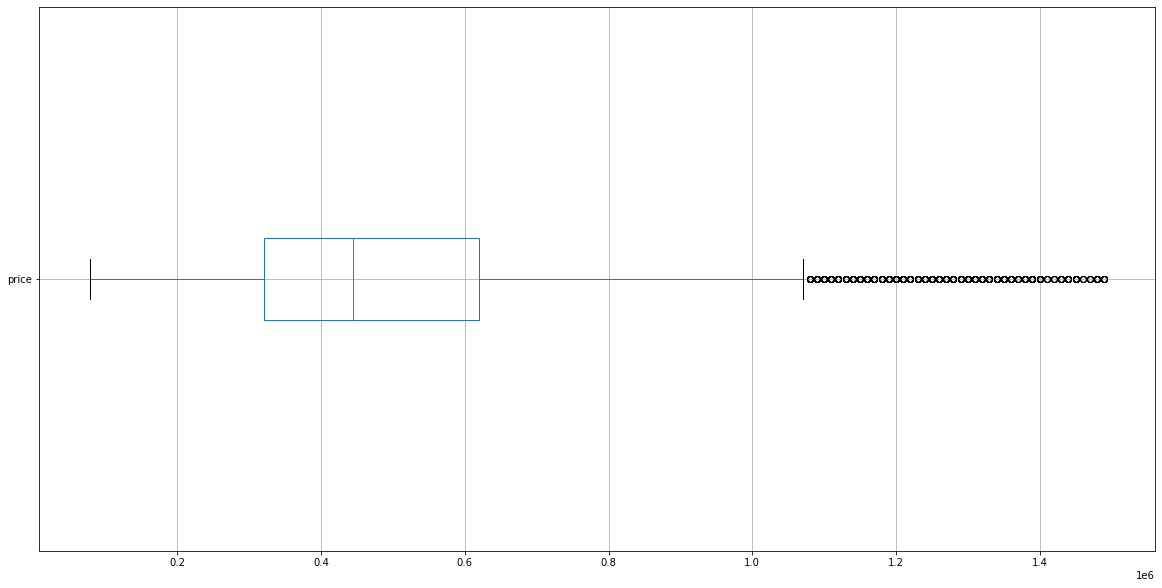

In [ ]:
df.boxplot('price', vert=False, figsize=(20,10))

In [ ]:
print('Summary statistics for prices for all houses')
print('Mean:' , df.price.mean())
print('Median: ', df.price.median())
print('Standard deviation: ', df.price.std())

print('\nSummary statistics for prices listed with waterfront')
waterfront_prop = df[df.waterfront == 1]
print('Mean: ', waterfront_prop.price.mean())
print('Median: ', waterfront_prop.price.median())
print('Standard deviation: ', waterfront_prop.price.std())

print('\nSummary statistics for prices listed with no waterfront')
non_waterfront_prop = df[df.waterfront==0]
print('Mean: ', non_waterfront_prop.price.mean())
print('Median: ', non_waterfront_prop.price.median())
print('Standard deviation', non_waterfront_prop.price.std())

Summary statistics for prices for all houses
Mean: 496804.3678989645
Median:  443975.0
Standard deviation:  240433.33132361717

Summary statistics for prices listed with waterfront
Mean:  859360.9589041095
Median:  825000.0
Standard deviation:  336127.93016021437

Summary statistics for prices listed with no waterfront
Mean:  495519.14325256157
Median:  442500.0
Standard deviation 239061.57693540168


C:\Users\Owner\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

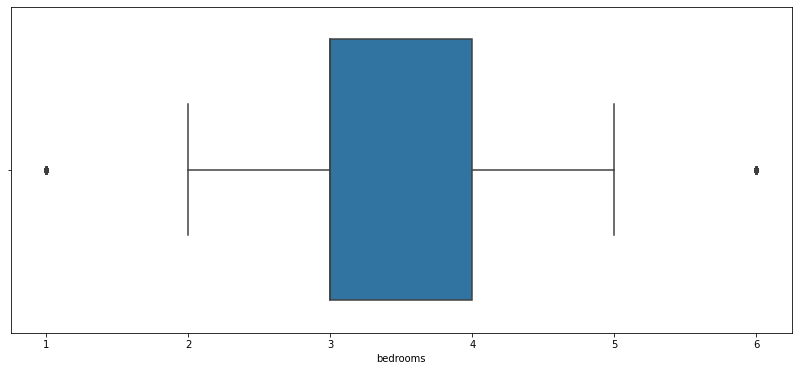

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(df.bedrooms)

<AxesSubplot:>

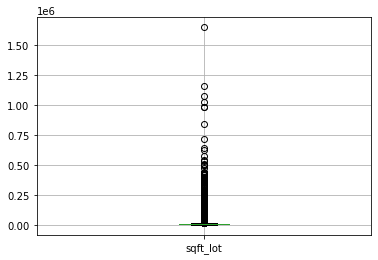

In [ ]:
df.boxplot(['sqft_lot'])

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,1200000.0,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,1450000.0,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


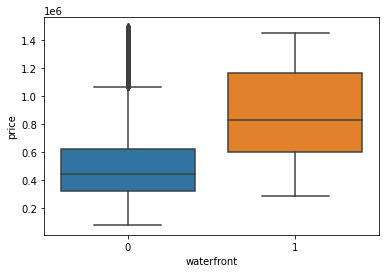

In [ ]:
ax = sns.boxplot(x=df.waterfront, y=df.price, data=df)

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
count,2.066600e+04,20666.000000,20666.000000,20666.000000,2.066600e+04,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000,20666.000000
mean,4.968044e+05,3.331511,2.065942,1994.818833,1.445070e+04,1.482967,0.003532,3.759363,0.853334,7.997193,1723.567405,265.558308,1970.838479,64.219007,35.380093,47.558549,-122.214262,1941.002516,12316.944498,145159.909416,51.161521,2014.325027,1.522839,0.032178
std,2.404333e+05,0.861012,0.709164,771.866307,3.917439e+04,0.538411,0.059330,0.872249,1.263963,2.031495,727.966641,407.580822,29.285387,352.211579,19.169282,0.140022,0.141550,627.823658,25426.663726,59171.016901,29.285387,0.468396,1.034973,0.176478
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7190.000000,7.000000,2014.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,4.000000,0.000000,8.000000,1180.000000,0.000000,1951.000000,0.000000,21.000000,47.465300,-122.330000,1480.000000,5045.250000,98510.000000,26.000000,2014.000000,1.000000,0.000000
50%,4.439750e+05,3.000000,2.250000,1880.000000,7.500000e+03,1.000000,0.000000,4.000000,0.000000,8.000000,1540.000000,0.000000,1974.000000,0.000000,34.000000,47.569500,-122.232000,1820.000000,7541.500000,141286.000000,48.000000,2014.000000,1.000000,0.000000
75%,6.200000e+05,4.000000,2.500000,2470.000000,1.035000e+04,2.000000,0.000000,4.000000,2.000000,9.000000,2130.000000,510.000000,1996.000000,0.000000,52.000000,47.679200,-122.124000,2310.000000,9904.500000,190960.000000,71.000000,2015.000000,2.000000,0.000000
max,1.490000e+06,6.000000,5.250000,4490.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,4480.000000,2220.000000,2015.000000,2015.000000,69.000000,47.777600,-121.315000,5790.000000,560617.000000,277894.000000,122.000000,2015.000000,3.000000,1.000000


<AxesSubplot:>

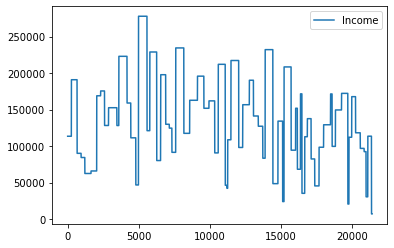

In [ ]:
df.plot(y = 'Income')

<AxesSubplot:xlabel='price'>

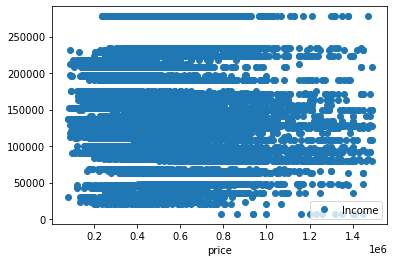

In [ ]:
df.plot(x='price', y='Income', style='o')

<AxesSubplot:>

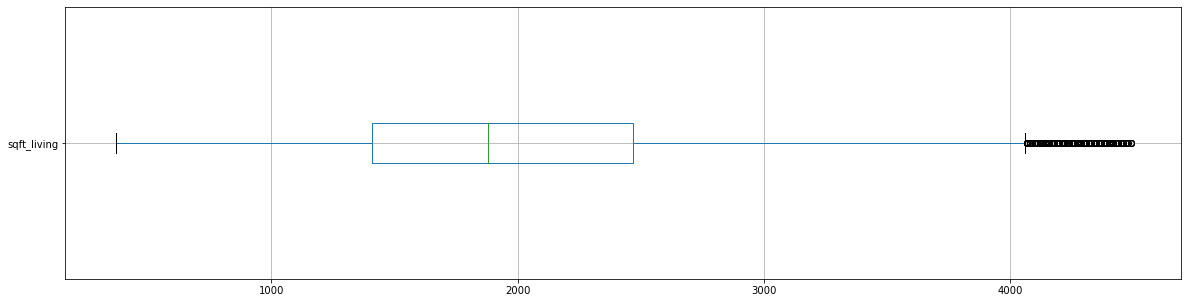

In [ ]:
df.boxplot('sqft_living', vert=False, figsize=(20,5))

In [ ]:
df["season"].value_counts()

1    6522
2    5654
3    4547
0    3943
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='price'>

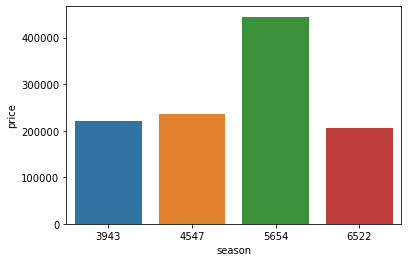

In [ ]:
sns.barplot(x =df["season"].value_counts(), y =df["price"] ,data=df)

In [ ]:
pd.set_option('display.max_columns', None)
seasons = df.groupby("season").mean()
seasons

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,renovated
season,,,,,,,,,,,,,,,,,,,,,,,
0,484014.961958,3.326655,2.028024,1950.065940,14383.822977,1.456252,0.002790,3.750190,0.784428,8.012173,1688.131879,255.679939,1970.902359,58.173218,35.163327,47.549445,-122.214690,1907.229521,11698.400457,146326.583059,51.097641,2015.00000,0.029166
1,509936.719411,3.336093,2.074862,2000.621588,14489.397424,1.485051,0.003833,3.762190,0.860472,7.973781,1722.856639,271.940969,1970.614075,63.339466,35.938976,47.562086,-122.214560,1952.373965,12578.518246,144390.155474,51.385925,2014.42533,0.031739
2,497825.234170,3.336753,2.090202,2021.266891,14155.815175,1.496463,0.002830,3.766537,0.903254,8.025822,1752.155288,262.390697,1971.453307,68.533781,34.795720,47.560522,-122.209455,1963.853378,12223.715246,143971.573576,50.546693,2014.00000,0.034312
3,487789.072795,3.322630,2.055861,1992.416758,14819.868925,1.486365,0.004618,3.754344,0.840774,7.982186,1719.767539,268.908291,1970.340444,65.358038,35.493072,47.558917,-122.219443,1925.564548,12594.062019,146729.953816,51.659556,2014.00000,0.032769


In [ ]:
seasons

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,renovated
season,,,,,,,,,,,,,,,,,,,,,,,
0,484014.961958,3.326655,2.028024,1950.065940,14383.822977,1.456252,0.002790,3.750190,0.784428,8.012173,1688.131879,255.679939,1970.902359,58.173218,35.163327,47.549445,-122.214690,1907.229521,11698.400457,146326.583059,51.097641,2015.00000,0.029166
1,509936.719411,3.336093,2.074862,2000.621588,14489.397424,1.485051,0.003833,3.762190,0.860472,7.973781,1722.856639,271.940969,1970.614075,63.339466,35.938976,47.562086,-122.214560,1952.373965,12578.518246,144390.155474,51.385925,2014.42533,0.031739
2,497825.234170,3.336753,2.090202,2021.266891,14155.815175,1.496463,0.002830,3.766537,0.903254,8.025822,1752.155288,262.390697,1971.453307,68.533781,34.795720,47.560522,-122.209455,1963.853378,12223.715246,143971.573576,50.546693,2014.00000,0.034312
3,487789.072795,3.322630,2.055861,1992.416758,14819.868925,1.486365,0.004618,3.754344,0.840774,7.982186,1719.767539,268.908291,1970.340444,65.358038,35.493072,47.558917,-122.219443,1925.564548,12594.062019,146729.953816,51.659556,2014.00000,0.032769


<AxesSubplot:xlabel='season', ylabel='price'>

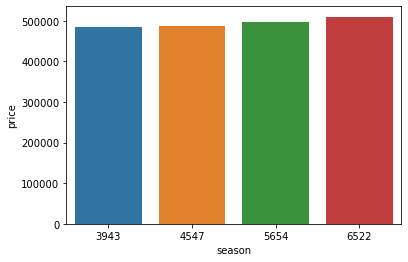

In [ ]:
sns.barplot(x =df["season"].value_counts(), y =seasons["price"] ,data=df)

In [ ]:
y = df["price"]

In [ ]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:57:11   Log-Likelihood:            -2.7429e+05
No. Observations:               20666   AIC:                         5.486e+05
Df Residuals:                   20643   BIC:                         5.488e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.234e+04   1492.553    -14.970      0.000   -2.53e+04   -1.94e+04
bathrooms      3.781e+04   2406.776     15.708      0.000    3.31e+04    4.25e+04
sqft_living     119.5813     13.755      8.693      0.000      92.620     146.543
sqft_lot          0.2225      0.035      6.328      0.000       0.154       0.291
floors         5.135e+04   2621.637     19.585      0.000    4.62e+04    5.65e+04
waterfront     2.474e+05   1.69e+04     14.661      0.000    2.14e+05     2.8e+05
view          -2.614e+04   1196.048    -21.857      0.000   -2.85e+04   -2.38e+04
condition      1.546e+04    881.537     17.533      0.000    1.37e+04    1.72e+04
grade         -6853.1116    500.610    -13.690      0.000   -7834.348   -5871.876
sqft_above       20.7932     13.731      1.514      0.130      -6.121      47.707
sqft_basement     6.9889     13.622      0.513      0.608     -19.711      33.688
yr_built      -5.052e+04   3188.071    -15.847      0.000   -5.68e+04   -4.43e+04
yr_renovated   3613.5528    341.740     10.574      0.000    2943.715    4283.391
zipcode       -1089.3982     64.667    -16.846      0.000   -1216.151    -962.645
lat            6.322e+05   7585.817     83.334      0.000    6.17e+05    6.47e+05
long          -2.196e+05   9547.769    -23.004      0.000   -2.38e+05   -2.01e+05
sqft_living15    83.6292      2.532     33.027      0.000      78.666      88.592
sqft_lot15       -0.2428      0.055     -4.426      0.000      -0.350      -0.135
Income           -0.2768      0.018    -15.133      0.000      -0.313      -0.241
house_age     -4.911e+04   3191.196    -15.388      0.000   -5.54e+04   -4.29e+04
year_sold      2.252e+04   3136.320      7.181      0.000    1.64e+04    2.87e+04
season         1017.7691   1416.544      0.718      0.472   -1758.770    3794.308
renovated     -7.158e+06   6.82e+05    -10.495      0.000   -8.49e+06   -5.82e+06
==============================================================================
Omnibus:                     3390.520   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9721.209
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                       5.868   Cond. No.                     1.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df["season"].value_counts()

1    6522
2    5654
3    4547
0    3943
Name: season, dtype: int64

In [ ]:
#red= srping, green = summer, yellow= fall, blue = winter

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,1180,0.0,1955,0.0,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,880,0.0,1945,0.0,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,1620,480.0,1967,0.0,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,1300,0.0,1961,0.0,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,860,0.0,1931,0.0,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,1260000.0,3,2.50,3110,9930,1.0,0,2,0,9,1640,1470.0,1954,0.0,24,47.6112,-122.226,3650,14399,7190.0,68,2014,2,0
21404,1200000.0,4,3.00,2150,8119,2.0,0,4,0,9,2150,0.0,1953,2004.0,24,47.6335,-122.236,1590,8119,7190.0,69,2015,1,1
21407,1450000.0,5,2.75,3090,19865,1.0,0,4,2,10,3090,0.0,1953,0.0,24,47.6232,-122.235,2970,19862,7190.0,69,2014,3,0
21410,1350000.0,3,2.00,2070,9600,1.0,0,2,0,8,1590,480.0,1946,0.0,24,47.6160,-122.239,3000,16215,7190.0,76,2014,2,0


In [ ]:
y = df.groupby(["season","zipcode"])
y

In [ ]:
# 1= srping, 2= summer, 3 = fall, 4 = winter

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,113555.0,67,2014,fall,not_renovated,0
1,205425.0,2,1.00,880,6780,1.0,NO,Good,6 Low Average,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,113555.0,77,2014,spring,not_renovated,0
2,445000.0,3,2.25,2100,8201,1.0,NO,Average,8 Good,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,113555.0,55,2014,summer,not_renovated,1
3,236000.0,3,1.00,1300,5898,1.0,NO,Average,7 Average,1300,0.0,1961,0.0,98178,47.5053,-122.255,1320,7619,113555.0,61,2014,summer,not_renovated,0
4,170000.0,2,1.00,860,5265,1.0,NO,Average,6 Low Average,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,113555.0,91,2015,winter,not_renovated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,NO,Good,11 Excellent,3990,0.0,1989,0.0,98039,47.6177,-122.229,3450,16087,7190.0,33,2014,fall,not_renovated,0
21416,1950000.0,4,3.50,4065,18713,2.0,NO,Good,10 Very Good,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,7190.0,35,2014,summer,not_renovated,0
21417,2250000.0,5,5.25,3410,8118,2.0,NO,Average,11 Excellent,3410,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,7190.0,16,2015,spring,not_renovated,0
21418,2900000.0,5,4.00,5190,14600,2.0,NO,Average,11 Excellent,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,7190.0,9,2014,fall,not_renovated,1


In [ ]:
i = df.groupby("view_cat")["price"].median()
i

view_cat
0    435000.0
1    750000.0
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='price'>

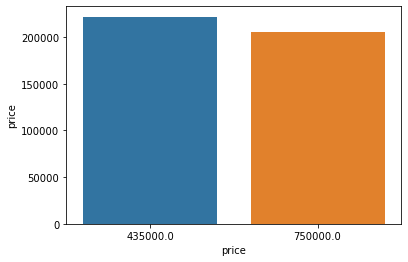

In [ ]:
sns.barplot(x =i, y =df["price"] ,data=df,ci = False)

<AxesSubplot:xlabel='view_cat', ylabel='price'>

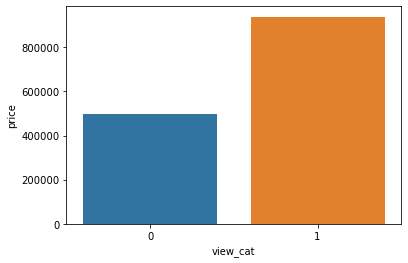

In [ ]:
sns.barplot(x =df["view_cat"], y =df["price"] ,data=df,ci = False)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated,view_cat
0,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,113555.0,67,2014,fall,not_renovated,0
1,205425.0,2,1.00,880,6780,1.0,NO,Good,6 Low Average,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,113555.0,77,2014,spring,not_renovated,0
2,445000.0,3,2.25,2100,8201,1.0,NO,Average,8 Good,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,113555.0,55,2014,summer,not_renovated,1
3,236000.0,3,1.00,1300,5898,1.0,NO,Average,7 Average,1300,0.0,1961,0.0,98178,47.5053,-122.255,1320,7619,113555.0,61,2014,summer,not_renovated,0
4,170000.0,2,1.00,860,5265,1.0,NO,Average,6 Low Average,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,113555.0,91,2015,winter,not_renovated,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,NO,Good,11 Excellent,3990,0.0,1989,0.0,98039,47.6177,-122.229,3450,16087,7190.0,33,2014,fall,not_renovated,0
21416,1950000.0,4,3.50,4065,18713,2.0,NO,Good,10 Very Good,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,7190.0,35,2014,summer,not_renovated,0
21417,2250000.0,5,5.25,3410,8118,2.0,NO,Average,11 Excellent,3410,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,7190.0,16,2015,spring,not_renovated,0
21418,2900000.0,5,4.00,5190,14600,2.0,NO,Average,11 Excellent,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,7190.0,9,2014,fall,not_renovated,1


In [ ]:
df.groupby("zipcode")